02 Using Nipype to load fMRI data
=====================
#### Date: Feb 7 2018; Author: Farahana

In [1]:
from nipype import SelectFiles, Node, DataSink
from nipype.interfaces.base import Bunch

import pandas as pd

/home/farahana/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


We will try to do "Preprocessing" based on figure below;

![nipype flow](images/neuro_1.png "Neuroimaging Flow")

We are using OpenfMRI.org dataset according to BIDS structure.

In [22]:
# The template string
templates = { 'anat' : 'sub*/anatomy/highres001.nii*',
              'func' : 'sub*/BOLD/task001_run{ses_no}/bold.nii*'}

# How to address and import using SelectFiles node
sf = Node(SelectFiles(templates),
          name='selectfiles')

sf.inputs.base_directory = '/home/farahana/Documents/dataset/Multi_Subject/ds117'

In [23]:
# We will feed the {}-based placeholder strings with values
sf.inputs.ses_no = "001"
#sf.inputs.task_name = 'reversalweatherprediction'

In [24]:
sf.run().outputs

180212-12:39:53,232 workflow INFO:
	 Executing node selectfiles in dir: /tmp/tmplaa08ypp/selectfiles
180212-12:39:53,234 workflow INFO:
	 Running node "selectfiles" ("nipype.interfaces.io.SelectFiles").



anat = ['/home/farahana/Documents/dataset/Multi_Subject/ds117/sub001/anatomy/highres001.nii', '/home/farahana/Documents/dataset/Multi_Subject/ds117/sub002/anatomy/highres001.nii', '/home/farahana/Documents/dataset/Multi_Subject/ds117/sub003/anatomy/highres001.nii.gz', '/home/farahana/Documents/dataset/Multi_Subject/ds117/sub004/anatomy/highres001.nii.gz', '/home/farahana/Documents/dataset/Multi_Subject/ds117/sub005/anatomy/highres001.nii.gz', '/home/farahana/Documents/dataset/Multi_Subject/ds117/sub006/anatomy/highres001.nii.gz', '/home/farahana/Documents/dataset/Multi_Subject/ds117/sub007/anatomy/highres001.nii.gz', '/home/farahana/Documents/dataset/Multi_Subject/ds117/sub008/anatomy/highres001.nii.gz', '/home/farahana/Documents/dataset/Multi_Subject/ds117/sub009/anatomy/highres001.nii.gz', '/home/farahana/Documents/dataset/Multi_Subject/ds117/sub010/anatomy/highres001.nii.gz', '/home/farahana/Documents/dataset/Multi_Subject/ds117/sub011/anatomy/highres001.nii.gz', '/home/farahana/Do

Let us look at the TSV file of the dataset

In [ ]:
trialinfo = pd.read_table('/home/farahana/Documents/dataset/ds052/sub-01/func/sub-01_task-reversalweatherprediction_run-1_events.tsv')
trialinfo.head()

We will split based on two conditions:

In [ ]:
for group in trialinfo.groupby('trial_type'):
    print(group)

In [ ]:
conditions = []
onsets = []
durations = []

for group in trialinfo.groupby('trial_type'):
    conditions.append(group[0])
    onsets.append(group[1].onset.tolist())
    durations.append(group[1].duration.tolist())

subject_info = Bunch(conditions=conditions,
                     onsets=onsets,
                     durations=durations)
#subject_info.items()

In [4]:
sink = DataSink()

In [5]:
experiment_dir = '/experiment_folder'

In [6]:
sink.inputs.base_directory = experiment_dir + '/output_folder'

In [ ]:
import nipype.interfaces.afni as afni
realign =afni.Retroicor()

In [ ]:
import nipype.interfaces.freesurfer as fs
coreg = fs.BBRegister()

In [ ]:
import nipype.interfaces.ants as ants
normalize = ants.WarpTimeSeriesImageMultiTransform()

In [ ]:
from nipype.pipeline.engine import Workflow

In [ ]:
# Create a preprocessing workflow
preproc = Workflow(name='preproc')

In [ ]:
preproc.connect([(sf -> realign),
                 (realign -> coreg),
                 (coreg -> normalize),
                 (normalize -> sink)])

In [ ]:
preproc.connect(sf, realign, [("out_file", "in_file")])

In [ ]:
!bet /home/farahana/Documents/dataset/ds052/sub-01/anat/sub-01_run-1_T1w.nii.gz output/T1_bet.nii.gz

In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [7]:
from nilearn.plotting import plot_img, plot_anat, plot_stat_map

# Import BET from the FSL interface
from nipype.interfaces.fsl import BET

### Plotting Before and after Brain Extraction of Anatomical maps 

In [25]:
skullstrip = BET(in_file="/home/farahana/Documents/dataset/Multi_Subject/ds117/sub003/anatomy/highres001.nii.gz",
                out_file = "output/ds117_run001_bet.nii.gz", mask = True)

In [26]:
skullstrip.run()

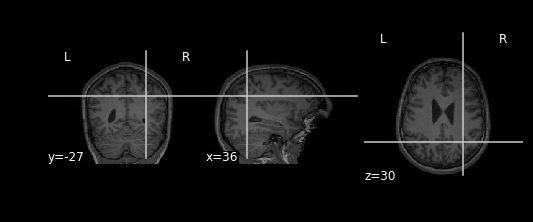

In [28]:
plot_anat('/home/farahana/Documents/dataset/Multi_Subject/ds117/sub003/anatomy/highres001.nii.gz',
           cut_coords=(36, -27, 30))

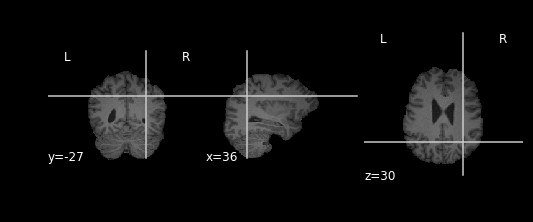

In [29]:
plot_anat('output/ds117_run001_bet.nii.gz', cut_coords=(36, -27, 30))

### Plotting Before and after Brain Extraction of Functional maps 

In [37]:
skullstrip_func = BET(in_file="/home/farahana/Documents/dataset/Multi_Subject/ds117/sub003/BOLD/task001_run001/bold.nii",
                out_file = "output/func_ds117_run001_bet.nii.gz")

In [38]:
skullstrip_func.run()

In [42]:
from nilearn import image

In [43]:
func_ds117_mean = image.mean_img('/home/farahana/Documents/dataset/Multi_Subject/ds117/sub003/BOLD/task001_run001/bold.nii')

In [44]:
func_ds117_bet_mean = image.mean_img('output/func_ds117_run001_bet.nii.gz')

In [97]:
plot_anat(np.asarray (data_1.dataobj[:,:,:,0]),
              cut_coords=(36, -27, 30))

TypeError: Data given cannot be loaded because it is not compatible with nibabel format:
27

In [113]:
aff = data_1.get_affine()

/home/farahana/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  if __name__ == '__main__':


In [119]:
ctr = np.dot(np.linalg.inv(aff), [0, 0, 0, 1])[:3]

In [122]:
vmin, vmax = (0, 1) if data_1.get_fdata().dtype == np.int16 else (30, 150)

In [131]:
data = data_1.get_fdata()

In [132]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(np.rot90(data_1[:, :, ctr[2] + 5]), 
               cmap="gray", vmin=vmin, vmax=vmax)

TypeError: Cannot slice image objects; consider slicing image array data with `img.dataobj[slice]` or `img.get_data()[slice]`

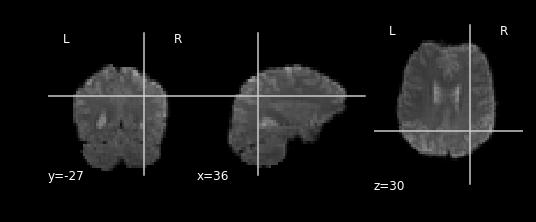

In [47]:
plot_anat(func_ds117_bet_mean,
              cut_coords=(36, -27, 30))

In [146]:
data_1 = nib.load('/home/farahana/Documents/dataset/Multi_Subject/ds117/sub003/BOLD/task001_run001/bold.nii')

In [142]:
a = np.array(data_1)

In [152]:
a = data_1.get_data()

In [153]:
a.shape

(64, 64, 33, 210)

In [154]:
b = a[:,:,:,0]
b.shape

(64, 64, 33)

In [155]:
plot_anat(b,cut_coords=(36, -27, 30) )

TypeError: Data given cannot be loaded because it is not compatible with nibabel format:
27

In [ ]:
a = data_1 